<a href="https://colab.research.google.com/github/Nouman97/Computer-Vision/blob/master/Titanic_Survival_Classifier_based_on_Exploratory_Data_Analysis_ML_NN_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
os. chdir("/content/gdrive/My Drive/machine-learning-master/projects/titanic_survival_exploration")

In [0]:
# data can be obtained from the following link: https://github.com/udacity/machine-learning/tree/master/projects/titanic_survival_exploration

data_directory = 'titanic_data.csv'

In [0]:
# visuals can be obtained from the following link: https://github.com/udacity/machine-learning/tree/master/projects/titanic_survival_exploration
# visuals is only helping us in simplifying visualization => one can also use matplotlib for that purpose

import visuals as vs

In [0]:
from IPython.display import display

In [7]:
data = pd.read_csv(data_directory)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
target = data["Survived"]
data = data.drop("Survived", axis = 1)

data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
def accuracy_score(truth, pred):
  a = 0
  if len(truth) == len(pred):
    for i in range(len(truth)):
      if truth[i] == pred[i]:
        a = a + 1
    return "Predictions have an accuracy of {}".format((a/len(pred)) * 100)
  else:
    return "lengths are different"
  
test_array = np.array([1, 1, 1, 1, 1])
accuracy_score(target[:5], test_array)

'Predictions have an accuracy of 60.0'

In [10]:
def predict_zero(data):
  a = []
  for i, j in data.iterrows():
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html
    a.append(0)
  return a

test_array = predict_zero(data)
test_acc = accuracy_score(target, test_array)
print(test_acc)

Predictions have an accuracy of 61.61616161616161


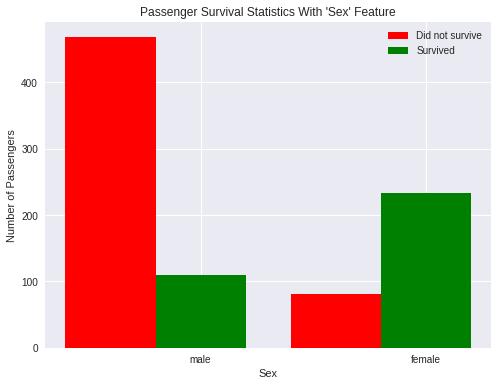

In [12]:
# vs is a pre-writen library 

vs.survival_stats(data, target, 'Sex')

In [13]:
def predict_one(data):
  a = []
  for i, j in data.iterrows():
    if j["Sex"] == "female":
      a.append(1)
    else:
      a.append(0)
  return a# or return pd.Series(a) -> since target is a panda series

test_array = predict_one(data)
test_acc = accuracy_score(target, test_array)
print(test_acc)
    

Predictions have an accuracy of 78.67564534231201


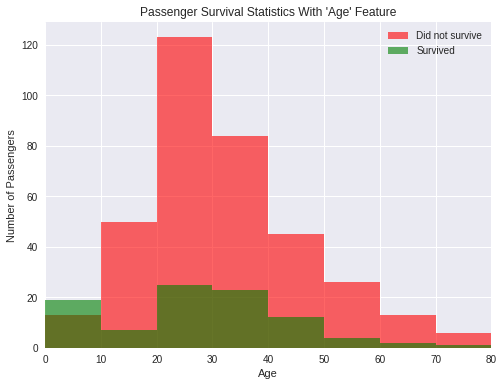

In [21]:
vs.survival_stats(data, target, 'Age', ["Sex == 'male'"])

In [16]:
def predict_two(data):
  a = []
  for i, j in data.iterrows():
    if j["Sex"] == "female":
      a.append(1)
    elif (j["Sex"] == "male" and j["Age"] <= 10):
      a.append(1)
    else:
      a.append(0)
  return a

test_array = predict_two(data)
test_acc = accuracy_score(target, test_array)
print(test_acc)

Predictions have an accuracy of 79.2368125701459


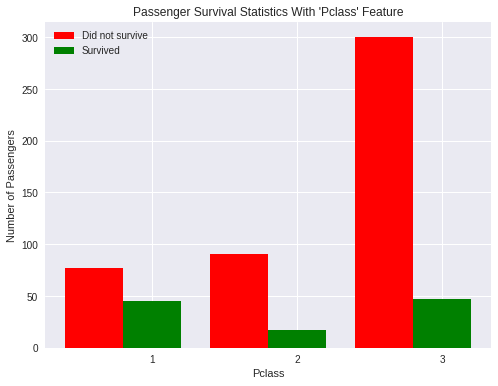

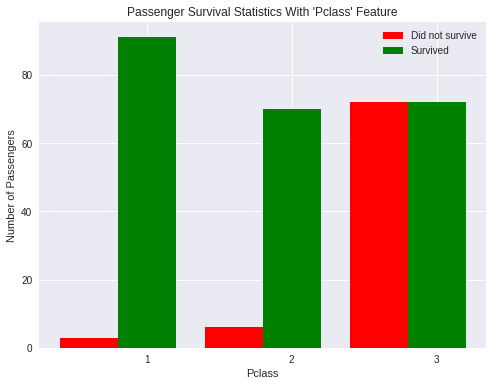

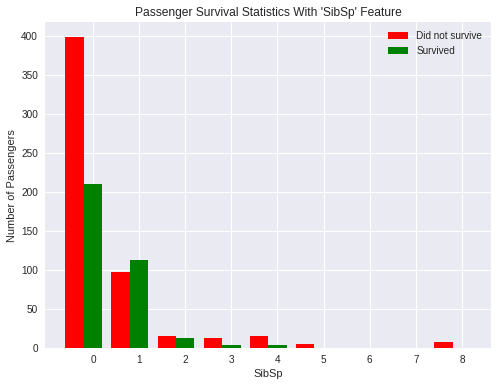

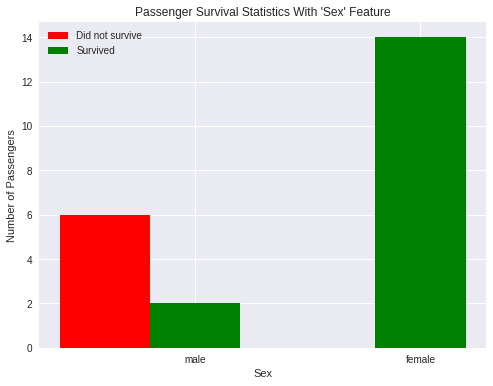

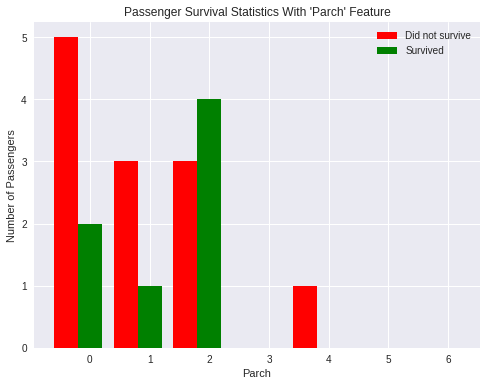

In [47]:
vs.survival_stats(data, target, 'Pclass', ["Sex == 'male'"])
vs.survival_stats(data, target, 'Pclass', ["Sex == 'female'"])
vs.survival_stats(data, target, 'SibSp')
vs.survival_stats(data, target, 'Sex', ["Fare > 160"])
vs.survival_stats(data, target, 'Parch', ["Sex == 'male'", "Fare > 100"])

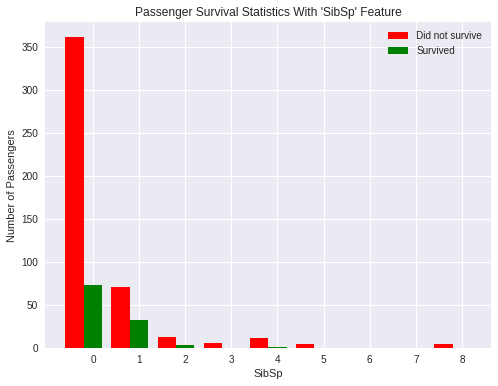

In [131]:
vs.survival_stats(data, target, 'SibSp', ["Sex == 'male'"])

In [137]:
# Decision tree made using exploratory data analysis and lots of trial and error

def predict_three(data):
  a = []
  for i, j in data.iterrows():
    if j["Sex"] == "female":
      a.append(1)
    elif j["Sex"] == "male":
      if j["Fare"] > 270:
        a.append(1)
      elif j["SibSp"] > 2:
        a.append(0)
      elif j["Age"] <= 10:
        a.append(1)
      else:
        a.append(0)
  return a

test_array = predict_three(data)
test_acc = accuracy_score(target, test_array)
print(test_acc)

Predictions have an accuracy of 80.92031425364759
